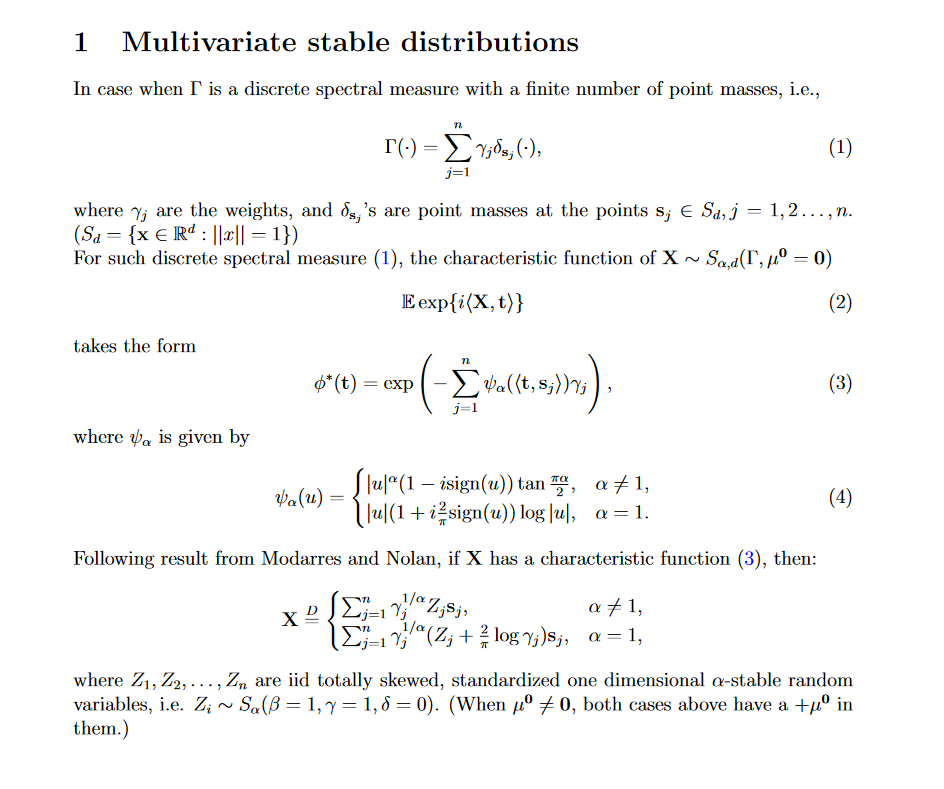

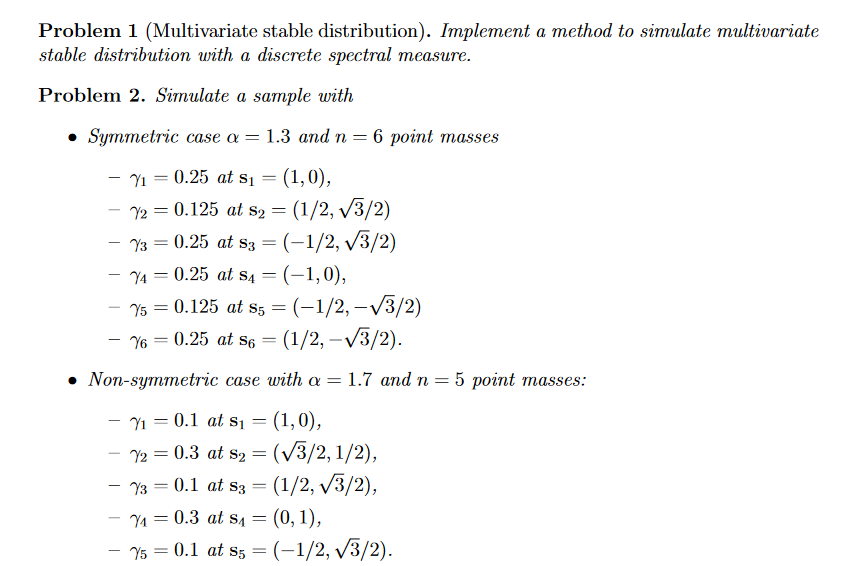

To simulate MSD sample, we need:

$\alpha$ parameter

$s = (s_1, \ldots, s_n)$, $s_i$ -- vectors (x, y)

$\gamma = (\gamma_1, \ldots, \gamma_n)$, $\gamma_i$ -- weights (numbers)

$\mu^0 = (\mu_1^0, \ldots, \mu_n^0)$, $\mu_i^0$ -- numbers

$N$ -- number of realisations

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm, kstest, levy_stable, cauchy
from scipy.special import gamma
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [13]:
alpha1 = 1.3
n1 = 6
mu1 = (0, 0)
N1 = 10000
gamma1 = [0.25, 0.125, 0.25, 0.25, 0.125, 0.25]
s1 = [(1, 0), (1/2, np.sqrt(3)/2), (-1/2, np.sqrt(3)/2), (-1, 0), (-1/2, -np.sqrt(3)/2), (1/2, -np.sqrt(3)/2)]

In [3]:
alpha2 = 1.7
n2 = 5
mu2 = (0, 0)
N2 = 10000
gamma2 = [0.1, 0.3, 0.1, 0.3, 0.1]
s2 = [(1, 0), (np.sqrt(3)/2, 1/2), (1/2, np.sqrt(3)/2), (0, 1), (-1/2, np.sqrt(3)/2)]

In [5]:
def sim_stable_vector(alpha, s, gamma, mu0, n, N):
    X = []
    Y = []
    if alpha != 1:
        for i in range(N):
            Z = levy_stable.rvs(alpha, 1, loc=0, scale=1, size=n)
            x = np.sum([gamma[j]**(1/alpha)*Z[j]*s[j][0] for j in range(n)]) + mu0[0]
            y = np.sum([gamma[j]**(1/alpha)*Z[j]*s[j][1] for j in range(n)]) + mu0[1]
            X.append(x)
            Y.append(y)
        return X, Y
    else:
        pass

In [14]:
xs, ys = sim_stable_vector(alpha1, s1, gamma1, mu1, n1, N1)

In [23]:
sample = pd.DataFrame(list(zip(xs, ys)), columns=['X', 'Y'])
sample.head()

,X,Y
0,1.600617,2.206819
1,-3.248867,0.570009
2,-0.005244,-0.387738
3,0.364127,0.670730
4,-0.644797,-4.842443


(-20.0, 20.0)

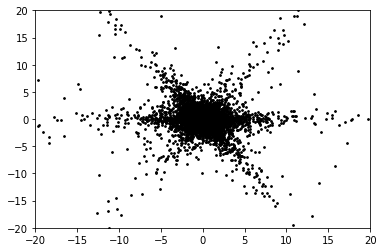

In [33]:
plt.scatter(xs, ys, s=3, c='black')
plt.xlim([-20, 20])
plt.ylim([-20, 20])

In [36]:
px.density_contour(sample, x=sample['X'], y=sample['Y'], range_x=(-20,20), range_y=(-20,20))

In [43]:
xs1, ys1 = sim_stable_vector(alpha1, s1, gamma1, mu1, n1, N1)

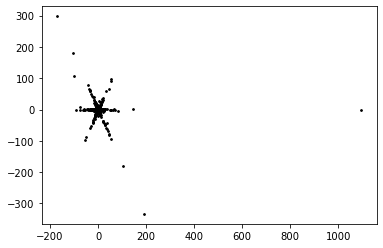

In [44]:
plt.scatter(xs1, ys1, s=3, c='black')

In [6]:
xs2, ys2 = sim_stable_vector(alpha2, s2, gamma2, mu2, n2, N2)

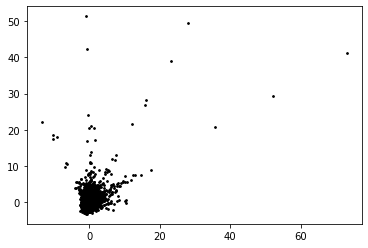

In [7]:
plt.scatter(xs2, ys2, s=3, c='black')

In [8]:
xs3, ys3 = sim_stable_vector(alpha2, s2, gamma2, mu2, n2, N2)

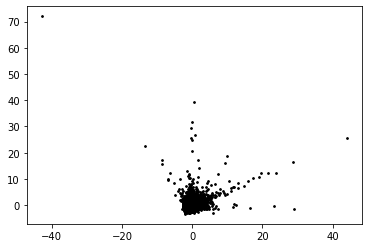

In [9]:
plt.scatter(xs3, ys3, s=3, c='black')